In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
#visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(style="seaborn")

import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.simplefilter("ignore")
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
dataCombined=pd.read_csv("allDataCombined.csv" ,encoding='unicode_escape')

In [4]:
dataCombined.head()

,country,iso,date,population,popPerSqKm,meanAge,urbanPop%,worldPop%,testUnit,#dailyTests,...,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H6Flag,H7VaccinationPolicy,H7Flag,H8ProtectionOfElderlyPeople,H8Flag
0,Afghanistan,AFG,2020/1/1,38928346,60,18,25%,0.50%,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN
1,Afghanistan,AFG,2020/1/2,38928346,60,18,25%,0.50%,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN
2,Afghanistan,AFG,2020/1/3,38928346,60,18,25%,0.50%,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN
3,Afghanistan,AFG,2020/1/4,38928346,60,18,25%,0.50%,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN
4,Afghanistan,AFG,2020/1/5,38928346,60,18,25%,0.50%,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN


In [5]:
df=pd.DataFrame(dataCombined,columns=["country","date","population","urbanPop%","#dailyTests","#testsTotal","#dailyTestsPerThousand","#testsTotalPerThousand","#tests7daySmooth","#tests7daySmoothPerThousand","positiveRate","positiveRatePerCase","#dailyVaccinationsRaw","#dailyVaccinations","#dailyVaccinationsPerMillion","#vaccinations","#vaccinationsPerHundred","#peopleVaccinated","#peopleVaccinatedPerHundred","#fullyVaccinated","#fullyVaccinatedPerHundred","#confirmedCases","#confirmedDeaths","stringencyIndex","governmentResponseIndex","containmentHealthIndex","economicSupportIndex","C1SchoolClosing","C2WorkplaceClosing","C3CancelPublicEvents","C4RestrictionsOnGatherings","C5ClosePublicTransport","C6StayAtHomeRequirements","C7RestrictionsOnInternalMovement","C8InternationalTravel Controls","E1IncomeSupport","E2Debt/contractRelief","E3FiscalMeasures","E4InternationalSupport","H1PublicInformationCampaigns","H2TestingPolicy","H3ContactTracing","H4EmergencyInvestmentInHealthcare","H5InvestmentInVaccines","H6FacialCoverings","H7VaccinationPolicy","H8ProtectionOfElderlyPeople"])
df

,country,date,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,...,E3FiscalMeasures,E4InternationalSupport,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople
0,Afghanistan,2020/1/1,38928346,25%,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020/1/2,38928346,25%,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020/1/3,38928346,25%,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020/1/4,38928346,25%,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020/1/5,38928346,25%,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135106,Zimbabwe,2021/9/24,14862924,38%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135107,Zimbabwe,2021/9/25,14862924,38%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135108,Zimbabwe,2021/9/26,14862924,38%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135109,Zimbabwe,2021/9/27,14862924,38%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df["mortality"]=df["#confirmedDeaths"]/df["#confirmedCases"]
df = df.fillna(0)
df.columns
print(df['country'].unique())
print(df['country'].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Croatia' 'Cuba' 'Cura_ao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guernsey' 'Guinea' 'Guinea-B

In [7]:
#select data from 01/09/2020-31/11/2020
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') 
df

,country,date,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,...,E4InternationalSupport,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople,mortality
0,Afghanistan,2020-01-01,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Afghanistan,2020-01-02,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Afghanistan,2020-01-03,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Afghanistan,2020-01-04,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Afghanistan,2020-01-05,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135106,Zimbabwe,2021-09-24,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035622
135107,Zimbabwe,2021-09-25,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035543
135108,Zimbabwe,2021-09-26,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035518
135109,Zimbabwe,2021-09-27,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035461


In [8]:
df2 = df.set_index('date')
df2

,country,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,positiveRate,...,E4InternationalSupport,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople,mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Afghanistan,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2020-01-02,Afghanistan,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2020-01-03,Afghanistan,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2020-01-04,Afghanistan,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2020-01-05,Afghanistan,38928346,25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,Zimbabwe,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035622
2021-09-25,Zimbabwe,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035543
2021-09-26,Zimbabwe,14862924,38%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035518


In [9]:
df_sep_nov = df2.loc['2020-09-01':'2020-11-30']
df_sep_nov

,country,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,positiveRate,...,E4InternationalSupport,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople,mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036832
2020-09-02,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036865
2020-09-03,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036822
2020-09-04,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036822
2020-09-05,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,3.0,0.036806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,Zimbabwe,14862924,38%,1770.0,164619.0,0.117,10.908,1040.0,0.069,0.079,...,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.028473
2020-11-27,Zimbabwe,14862924,38%,907.0,165526.0,0.060,10.968,1034.0,0.069,0.082,...,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.028310
2020-11-28,Zimbabwe,14862924,38%,1721.0,167247.0,0.114,11.082,1193.0,0.079,0.078,...,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.027998


In [10]:
df3=df_sep_nov
df3

,country,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,positiveRate,...,E4InternationalSupport,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople,mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036832
2020-09-02,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036865
2020-09-03,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036822
2020-09-04,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.036822
2020-09-05,Afghanistan,38928346,25%,0.0,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,3.0,0.036806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,Zimbabwe,14862924,38%,1770.0,164619.0,0.117,10.908,1040.0,0.069,0.079,...,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.028473
2020-11-27,Zimbabwe,14862924,38%,907.0,165526.0,0.060,10.968,1034.0,0.069,0.082,...,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.028310
2020-11-28,Zimbabwe,14862924,38%,1721.0,167247.0,0.114,11.082,1193.0,0.079,0.078,...,0.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.027998


In [11]:
df1=df3[["country","stringencyIndex","governmentResponseIndex","mortality"]]
df1

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Afghanistan,21.30,35.42,0.036832
2020-09-02,Afghanistan,21.30,35.42,0.036865
2020-09-03,Afghanistan,21.30,35.42,0.036822
2020-09-04,Afghanistan,21.30,35.42,0.036822
2020-09-05,Afghanistan,21.30,32.29,0.036806
...,...,...,...,...
2020-11-26,Zimbabwe,67.59,51.04,0.028473
2020-11-27,Zimbabwe,67.59,51.04,0.028310
2020-11-28,Zimbabwe,67.59,51.04,0.027998


In [12]:
df1_Italy=df1.loc[df1["country"]=="Italy"]
df1_Italy

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Italy,54.63,60.16,0.131356
2020-09-01,Italy,54.63,60.16,0.131356
2020-09-02,Italy,54.63,60.16,0.130737
2020-09-02,Italy,54.63,60.16,0.130737
2020-09-03,Italy,54.63,60.16,0.130104
...,...,...,...,...
2020-11-28,Italy,79.63,74.22,0.034747
2020-11-29,Italy,79.63,74.22,0.034636
2020-11-29,Italy,79.63,74.22,0.034636


In [13]:
df1_Spain=df1.loc[df1["country"]=="Spain"]
df1_Spain

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Spain,62.5,60.16,0.061897
2020-09-02,Spain,62.5,60.16,0.060877
2020-09-03,Spain,62.5,60.16,0.059843
2020-09-04,Spain,62.5,60.16,0.058955
2020-09-05,Spain,62.5,60.16,0.058955
...,...,...,...,...
2020-11-26,Spain,71.3,66.67,0.027436
2020-11-27,Spain,71.3,66.67,0.027434
2020-11-28,Spain,71.3,66.67,0.027434


In [14]:
df1_France=df1.loc[df1["country"]=="France"]
df1_France

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,France,46.76,54.69,0.098708
2020-09-02,France,46.76,54.69,0.096653
2020-09-03,France,48.61,55.73,0.094644
2020-09-04,France,48.61,55.73,0.092111
2020-09-05,France,48.61,55.73,0.089858
...,...,...,...,...
2020-11-26,France,78.70,69.53,0.023164
2020-11-27,France,78.70,69.53,0.023469
2020-11-28,France,75.00,67.45,0.023432


In [15]:
df1_UK=df1.loc[df1["country"]=="United Kingdom"]
df1_UK

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,United Kingdom,64.35,65.10,0.123096
2020-09-02,United Kingdom,64.35,65.10,0.122577
2020-09-03,United Kingdom,64.35,65.10,0.121991
2020-09-04,United Kingdom,64.35,65.10,0.121329
2020-09-05,United Kingdom,64.35,65.10,0.120724
...,...,...,...,...
2020-11-26,United Kingdom,67.59,67.71,0.036220
2020-11-27,United Kingdom,67.59,67.71,0.036212
2020-11-28,United Kingdom,67.59,67.71,0.036152


In [16]:
df1_Norway=df1.loc[df1["country"]=="Norway"]
df1_Norway

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Norway,37.96,38.02,0.024285
2020-09-02,Norway,37.96,38.02,0.023926
2020-09-03,Norway,37.96,38.02,0.023741
2020-09-04,Norway,37.96,38.02,0.023506
2020-09-05,Norway,37.96,38.02,0.023371
...,...,...,...,...
2020-11-26,Norway,56.02,48.96,0.009094
2020-11-27,Norway,56.02,48.96,0.009320
2020-11-28,Norway,56.02,48.96,0.009227


In [17]:
df1_South_Korea=df1.loc[df1["country"]=="South Korea"]
df1_South_Korea

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,South Korea,53.24,51.82,0.015942
2020-09-02,South Korea,50.46,50.26,0.015937
2020-09-03,South Korea,50.46,50.26,0.015881
2020-09-04,South Korea,50.46,50.26,0.015850
2020-09-05,South Korea,50.46,50.26,0.015772
...,...,...,...,...
2020-11-26,South Korea,57.87,55.99,0.015690
2020-11-27,South Korea,57.87,55.99,0.015640
2020-11-28,South Korea,57.87,55.99,0.015462


In [18]:
df1_India=df1.loc[df1["country"]=="India"]
df1_India

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,India,85.65,70.31,0.017597
2020-09-02,India,85.65,70.31,0.017485
2020-09-03,India,85.65,70.31,0.017393
2020-09-04,India,85.65,70.31,0.017290
2020-09-05,India,85.65,70.31,0.017168
...,...,...,...,...
2020-11-26,India,68.98,64.06,0.014578
2020-11-27,India,68.98,64.06,0.014565
2020-11-28,India,68.98,64.06,0.014553


In [19]:
df1_Germany=df1.loc[df1["country"]=="Germany"]
df1_Germany

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Germany,59.72,58.07,0.037831
2020-09-02,Germany,59.72,58.07,0.037678
2020-09-03,Germany,57.87,57.03,0.037462
2020-09-04,Germany,49.54,52.34,0.037266
2020-09-05,Germany,49.54,52.34,0.037159
...,...,...,...,...
2020-11-26,Germany,62.04,55.21,0.015366
2020-11-27,Germany,62.04,55.21,0.015415
2020-11-28,Germany,62.04,55.21,0.015374


In [20]:
df1_Poland=df1.loc[df1["country"]=="Poland"]
df1_Poland

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Poland,36.11,38.28,0.030299
2020-09-01,Poland,36.11,38.28,0.030299
2020-09-02,Poland,36.11,38.28,0.030328
2020-09-02,Poland,36.11,38.28,0.030328
2020-09-03,Poland,36.11,38.28,0.030262
...,...,...,...,...
2020-11-28,Poland,75.00,69.79,0.017200
2020-11-29,Poland,75.00,69.79,0.017287
2020-11-29,Poland,75.00,69.79,0.017287


In [21]:
df1_Austria=df1.loc[df1["country"]=="Austria"]
df1_Austria

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Austria,37.96,50.00,0.026554
2020-09-02,Austria,37.96,50.00,0.026243
2020-09-03,Austria,37.96,50.00,0.025906
2020-09-04,Austria,37.96,50.00,0.025584
2020-09-05,Austria,37.96,50.00,0.025269
...,...,...,...,...
2020-11-26,Austria,82.41,82.29,0.010423
2020-11-27,Austria,82.41,82.29,0.010650
2020-11-28,Austria,82.41,82.29,0.010948


In [22]:
df1_Portugal=df1.loc[df1["country"]=="Portugal"]
df1_Portugal

,country,stringencyIndex,governmentResponseIndex,mortality
date,,,,
2020-09-01,Portugal,60.65,60.16,0.031317
2020-09-02,Portugal,60.65,60.16,0.031160
2020-09-03,Portugal,60.65,60.16,0.030973
2020-09-04,Portugal,60.65,60.16,0.030829
2020-09-05,Portugal,60.65,60.16,0.030662
...,...,...,...,...
2020-11-26,Portugal,63.89,63.54,0.015011
2020-11-27,Portugal,75.00,69.79,0.014960
2020-11-28,Portugal,75.00,69.79,0.015008


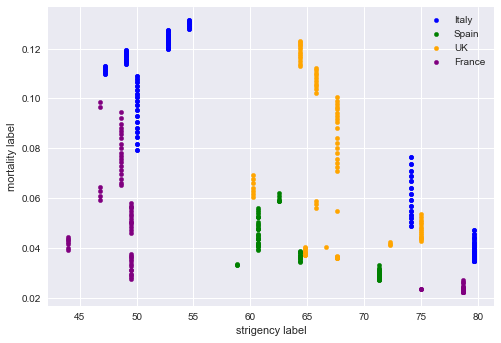

In [23]:
ax = df1_Italy.plot(kind="scatter", x="stringencyIndex",y="mortality", color="b", label="Italy")
df1_Spain.plot(kind="scatter", x="stringencyIndex",y="mortality", color="g", label="Spain", ax=ax)
df1_UK.plot(kind="scatter", x="stringencyIndex",y="mortality", color="orange", label="UK", ax=ax)
df1_France.plot(kind="scatter", x="stringencyIndex",y="mortality", color="purple", label="France", ax=ax)

ax.set_xlabel("strigency label")
ax.set_ylabel("mortality label")
plt.show()

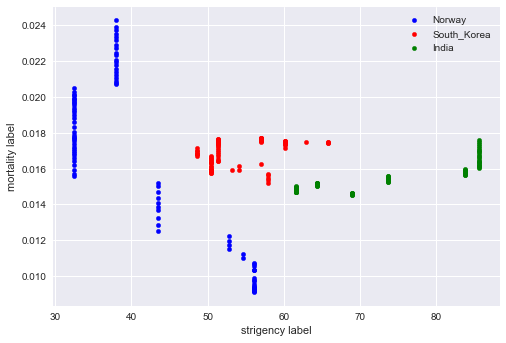

In [24]:
ax = df1_Norway.plot(kind="scatter", x="stringencyIndex",y="mortality", color="b", label="Norway")
df1_South_Korea.plot(kind="scatter",x="stringencyIndex",y="mortality", color="r", label="South_Korea", ax=ax)
df1_India.plot(kind="scatter", x="stringencyIndex",y="mortality", color="g", label="India", ax=ax)
#df1_UK.plot(kind="scatter", x="stringencyIndex",y="mortality", color="orange", label="UK", ax=ax)
#df1_France.plot(kind="scatter", x="stringencyIndex",y="mortality", color="purple", label="France", ax=ax)

ax.set_xlabel("strigency label")
ax.set_ylabel("mortality label")
plt.show()

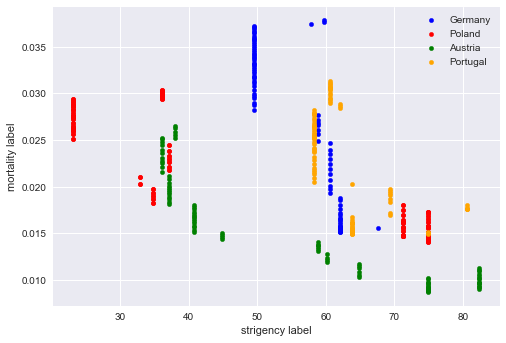

In [25]:
ax = df1_Germany.plot(kind="scatter", x="stringencyIndex",y="mortality", color="b", label="Germany")
df1_Poland.plot(kind="scatter",x="stringencyIndex",y="mortality", color="r", label="Poland", ax=ax)
df1_Austria.plot(kind="scatter", x="stringencyIndex",y="mortality", color="g", label="Austria", ax=ax)
df1_Portugal.plot(kind="scatter", x="stringencyIndex",y="mortality", color="orange", label="Portugal", ax=ax)
#df1_France.plot(kind="scatter", x="stringencyIndex",y="mortality", color="purple", label="France", ax=ax)

ax.set_xlabel("strigency label")
ax.set_ylabel("mortality label")
plt.show()

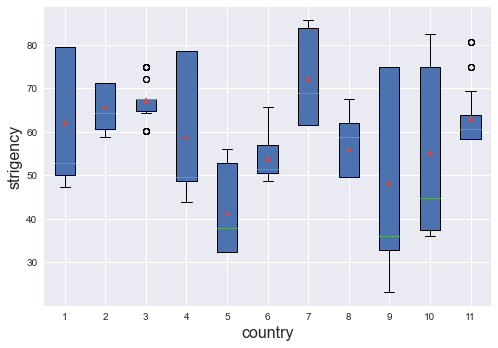

In [26]:
#Plot mean and standard deviation
x1 = df1_Italy["stringencyIndex"]
x2 = df1_Spain["stringencyIndex"] 
x3 = df1_UK["stringencyIndex"]
x4 = df1_France["stringencyIndex"]
x5 = df1_Norway["stringencyIndex"]
x6 = df1_South_Korea["stringencyIndex"]
x7 = df1_India["stringencyIndex"]
x8 = df1_Germany["stringencyIndex"]
x9 = df1_Poland["stringencyIndex"]
x10 = df1_Austria["stringencyIndex"]
x11 = df1_Portugal["stringencyIndex"]


plt.boxplot(x=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11],  whis=None,  patch_artist=True, meanline=None, showmeans=True, boxprops=None, labels=None)
#plt.boxplot(x2, notch=None,  whis=None,  patch_artist=True, meanline=None, showmeans=True, boxprops=None, labels=None)
#plt.boxplot(x3, notch=None,  whis=None,  patch_artist=True, meanline=None, showmeans=True, boxprops=None, labels=None)

plt.xlabel("country", size=16)
plt.ylabel("strigency", size=16)
plt.show()

In [27]:
#spearman correlation in all dataset use df
df_spearman_correlation=df[["stringencyIndex","mortality"]]
df_spearman_correlation

,stringencyIndex,mortality
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
135106,0.0,0.035622
135107,0.0,0.035543
135108,0.0,0.035518
135109,0.0,0.035461


In [28]:
x_simple = pd.DataFrame(df,columns=["stringencyIndex","mortality"])
my_r = x_simple.corr(method="spearman")
print(my_r)

                 stringencyIndex  mortality
stringencyIndex         1.000000   0.406575
mortality               0.406575   1.000000


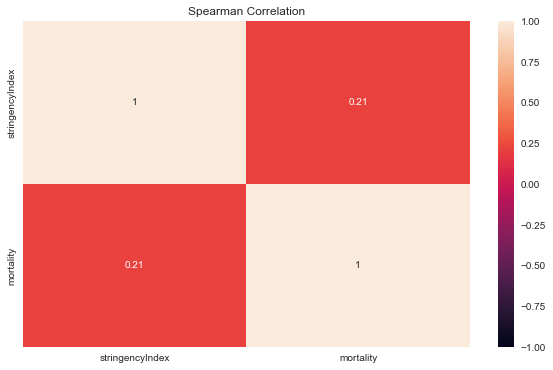

In [29]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
r_simple=display_correlation(x_simple)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.692082
mortality              -0.692082   1.000000


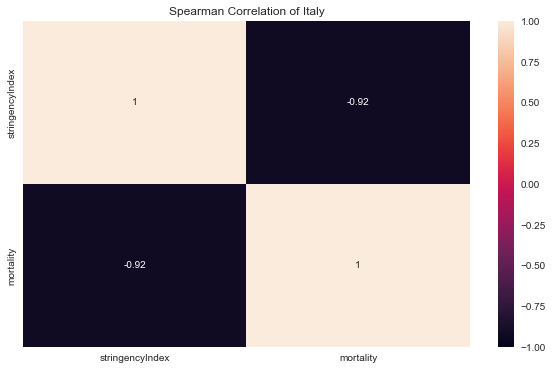

In [33]:
#Italy spearman correlation
x_simple_Italy = pd.DataFrame(df1_Italy,columns=["stringencyIndex","mortality"])
my_r = x_simple_Italy.corr(method="spearman")
print(my_r)
def display_correlation(df1_Italy):
    r = df1_Italy.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Italy.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Italy")
    return(r)
r_simple=display_correlation(x_simple_Italy)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.819297
mortality              -0.819297   1.000000


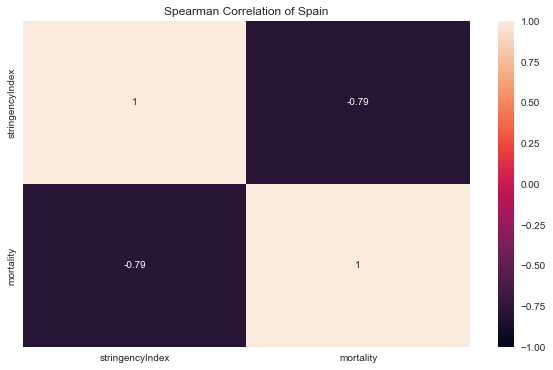

In [32]:
#Spain spearman correlation
x_simple_Spain = pd.DataFrame(df1_Spain,columns=["stringencyIndex","mortality"])
my_r = x_simple_Spain.corr(method="spearman")
print(my_r)
def display_correlation(df1_Spain):
    r = df1_Spain.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Spain.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Spain")
    return(r)
r_simple=display_correlation(x_simple_Spain)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.404371
mortality              -0.404371   1.000000


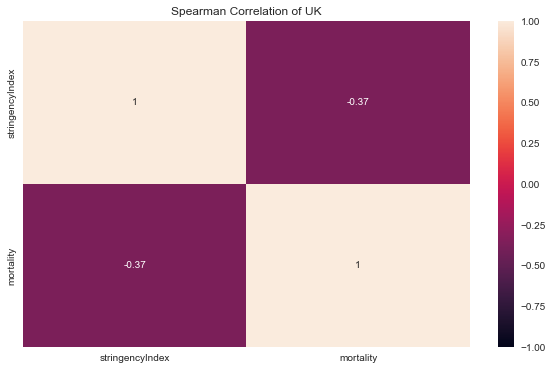

In [34]:
#UK spearman correlation
x_simple_UK = pd.DataFrame(df1_UK,columns=["stringencyIndex","mortality"])
my_r = x_simple_UK.corr(method="spearman")
print(my_r)
def display_correlation(df1_UK):
    r = df1_UK.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_UK.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of UK")
    return(r)
r_simple=display_correlation(x_simple_UK)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.828626
mortality              -0.828626   1.000000


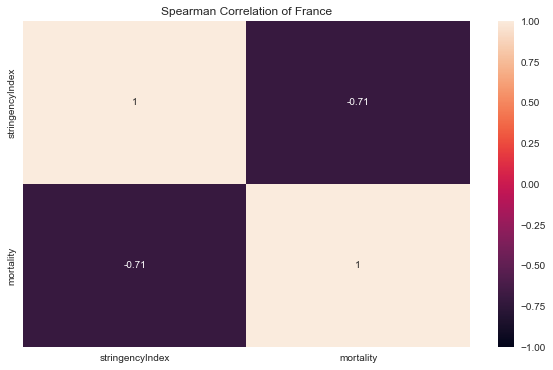

In [35]:
#France spearman correlation
x_simple_France = pd.DataFrame(df1_France,columns=["stringencyIndex","mortality"])
my_r = x_simple_France.corr(method="spearman")
print(my_r)
def display_correlation(df1_France):
    r = df1_France.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_France.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of France")
    return(r)
r_simple=display_correlation(x_simple_France)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.639937
mortality              -0.639937   1.000000


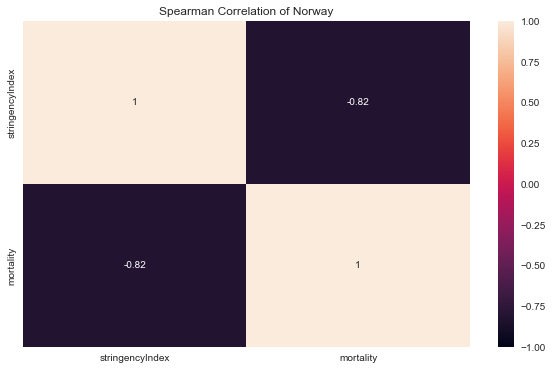

In [38]:
#Norway spearman correlation
x_simple_Norway = pd.DataFrame(df1_Norway,columns=["stringencyIndex","mortality"])
my_r = x_simple_Norway.corr(method="spearman")
print(my_r)
def display_correlation(df1_Norway):
    r = df1_Norway.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Norway.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Norway")
    return(r)
r_simple=display_correlation(x_simple_Norway)

                 stringencyIndex  mortality
stringencyIndex         1.000000   0.387843
mortality               0.387843   1.000000


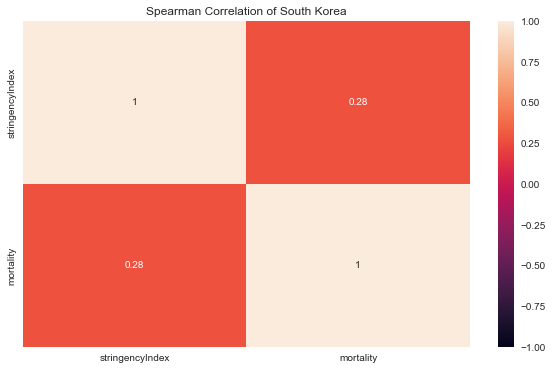

In [39]:
#South Korea spearman correlation
x_simple_South_Korea = pd.DataFrame(df1_South_Korea,columns=["stringencyIndex","mortality"])
my_r = x_simple_South_Korea.corr(method="spearman")
print(my_r)
def display_correlation(df1_South_Korea):
    r = df1_South_Korea.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_South_Korea.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of South Korea")
    return(r)
r_simple=display_correlation(x_simple_South_Korea)

                 stringencyIndex  mortality
stringencyIndex         1.000000   0.838566
mortality               0.838566   1.000000


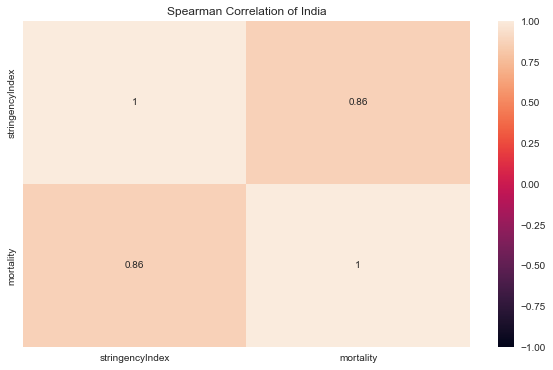

In [40]:
#India spearman correlation
x_simple_India = pd.DataFrame(df1_India,columns=["stringencyIndex","mortality"])
my_r = x_simple_India.corr(method="spearman")
print(my_r)
def display_correlation(df1_India):
    r = df1_India.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_India.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of India")
    return(r)
r_simple=display_correlation(x_simple_India)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.876296
mortality              -0.876296   1.000000


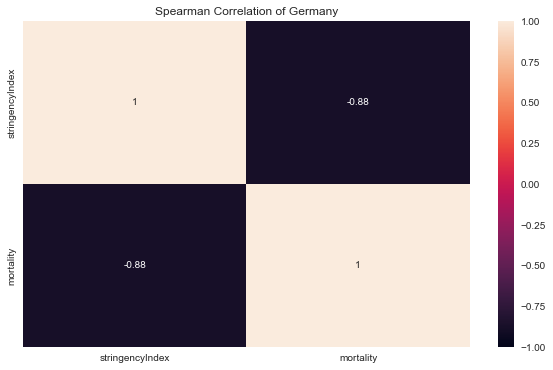

In [41]:
#Germany spearman correlation
x_simple_Germany = pd.DataFrame(df1_Germany,columns=["stringencyIndex","mortality"])
my_r = x_simple_Germany.corr(method="spearman")
print(my_r)
def display_correlation(df1_Germany):
    r = df1_Germany.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Germany.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Germany")
    return(r)
r_simple=display_correlation(x_simple_Germany)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.739161
mortality              -0.739161   1.000000


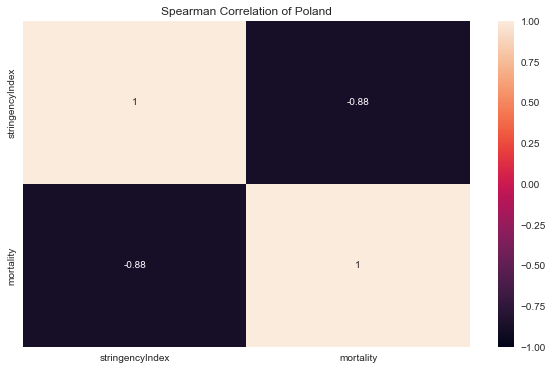

In [42]:
#Poland spearman correlation
x_simple_Poland = pd.DataFrame(df1_Poland,columns=["stringencyIndex","mortality"])
my_r = x_simple_Poland.corr(method="spearman")
print(my_r)
def display_correlation(df1_Poland):
    r = df1_Poland.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Poland.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Poland")
    return(r)
r_simple=display_correlation(x_simple_Poland)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.920297
mortality              -0.920297   1.000000


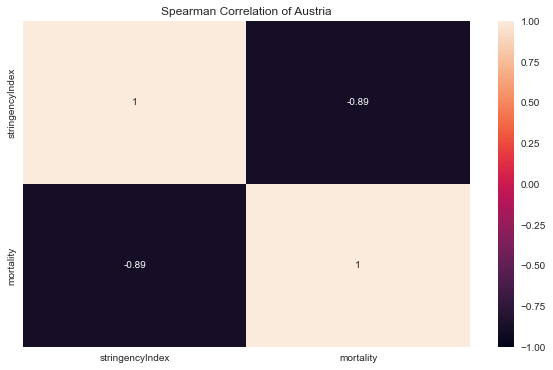

In [43]:
#Austria spearman correlation
x_simple_Austria = pd.DataFrame(df1_Austria,columns=["stringencyIndex","mortality"])
my_r = x_simple_Austria.corr(method="spearman")
print(my_r)
def display_correlation(df1_Austria):
    r = df1_Austria.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Austria.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Austria")
    return(r)
r_simple=display_correlation(x_simple_Austria)

                 stringencyIndex  mortality
stringencyIndex         1.000000  -0.610369
mortality              -0.610369   1.000000


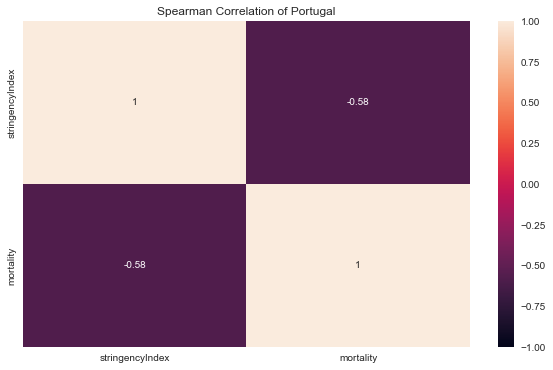

In [44]:
#Austria spearman correlation
x_simple_Portugal = pd.DataFrame(df1_Portugal,columns=["stringencyIndex","mortality"])
my_r = x_simple_Portugal.corr(method="spearman")
print(my_r)
def display_correlation(df1_Portugal):
    r = df1_Portugal.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1_Portugal.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation of Portugal")
    return(r)
r_simple=display_correlation(x_simple_Portugal)

In [185]:

df.to_csv("df_World",index=False)


In [20]:
#compare different countries trend(asia-china,euro-italy,america-united states,africa-algeria)
df_China=df.loc[df["country"]=="China"]
df_Italy=df.loc[df["country"]=="Italy"]
df_Unitedstates=df.loc[df["country"]=="United States"]
df_Algeria=df.loc[df["country"]=="Algeria"]
df_UK=df.loc[df["country"]=="United Kingdom"]
df_India=df.loc[df["country"]=="India"]
df_Norway=df.loc[df["country"]=="Norway"]
df_Sweden=df.loc[df["country"]=="Sweden"]
df_Finland=df.loc[df["country"]=="Finland"]
df_Denmark=df.loc[df["country"]=="Denmark"]
df_Denmark

,country,date,population,urbanPop%,#dailyTests,#testsTotal,#dailyTestsPerThousand,#testsTotalPerThousand,#tests7daySmooth,#tests7daySmoothPerThousand,...,E4InternationalSupport,H1PublicInformationCampaigns,H2TestingPolicy,H3ContactTracing,H4EmergencyInvestmentInHealthcare,H5InvestmentInVaccines,H6FacialCoverings,H7VaccinationPolicy,H8ProtectionOfElderlyPeople,mortality
31647,Denmark,2020/1/1,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
31648,Denmark,2020/1/2,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
31649,Denmark,2020/1/3,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
31650,Denmark,2020/1/4,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
31651,Denmark,2020/1/5,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32344,Denmark,2021/9/24,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,0.007409
32345,Denmark,2021/9/25,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,0.007402
32346,Denmark,2021/9/26,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,0.007400
32347,Denmark,2021/9/27,5792202,88%,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,0.007404


In [14]:
df_UK.to_csv("df_UK",index=False)
df_Italy.to_csv("df_Italy",index=False)
df_Unitedstates.to_csv("df_Unitedstates",index=False)
df_Algeria.to_csv("df_Algeria",index=False)
df_India.to_csv("df_India",index=False)
df_China.to_csv("df_China",index=False)
df_Norway.to_csv("df_Norway",index=False)
df_Sweden.to_csv("df_Sweden",index=False)

In [19]:
#SPSS for China
df_Finland.to_csv("df_Finland",index=False)


In [21]:
df_Denmark.to_csv("df_Denmark",index=False)

In [5]:
df_UK= pd.read_csv("df_UK.csv" ,encoding='unicode_escape')

NameError: name 'read_csv' is not defined

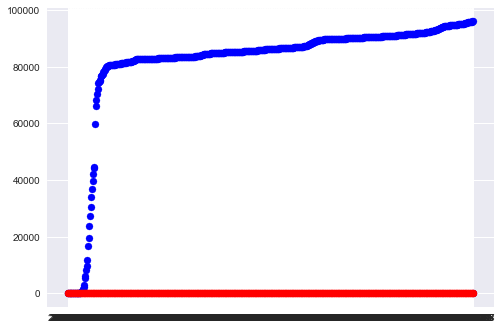

In [76]:
plt.scatter(df_China["date"],df_China["#confirmedCases"],color="blue")
plt.scatter(df_China["date"],df_China["stringencyIndex"],color="red")

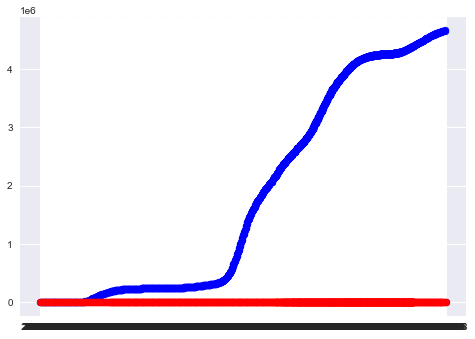

In [75]:
plt.scatter(df_Italy["date"],df_Italy["#confirmedCases"],color="blue")
plt.scatter(df_Italy["date"],df_Italy["stringencyIndex"],color="red")

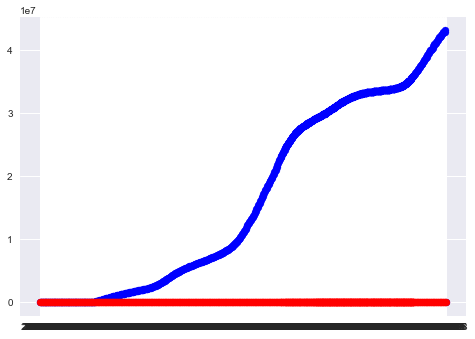

In [74]:
plt.scatter(df_Unitedstates["date"],df_Unitedstates["#confirmedCases"],color="blue")
plt.scatter(df_Unitedstates["date"],df_Unitedstates["stringencyIndex"],color="red")

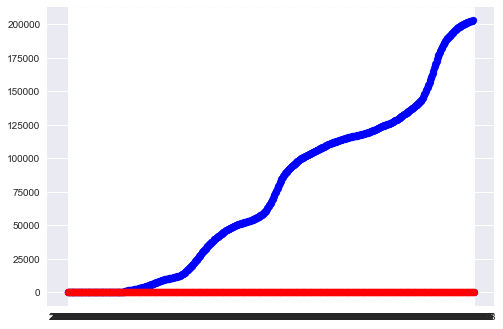

In [73]:
plt.scatter(df_Algeria["date"],df_Algeria["#confirmedCases"],color="blue")
plt.scatter(df_Algeria["date"],df_Algeria["stringencyIndex"],color="red")

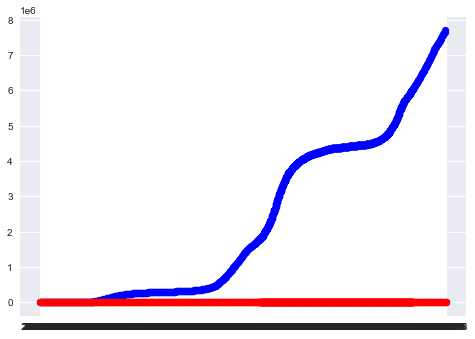

In [72]:
plt.scatter(df_UK["date"],df_UK["#confirmedCases"],color="blue")
plt.scatter(df_UK["date"],df_UK["stringencyIndex"],color="red")

In [ ]:
#逐步回归分析stepwise regression

